<a href="https://colab.research.google.com/github/jahnavi270/mean_stack_technologies/blob/main/traffic_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [ ]:
pip install conda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 299 kB 5.2 MB/s 
     |████████████████████████████████| 66 kB 5.1 MB/s 
     |████████████████████████████████| 109 kB 63.3 MB/s 
     |████████████████████████████████| 546 kB 54.9 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336960 sha256=ed2439e4898b8273cd608d0abef528f25218f394cb76b3498a656d8ab9bc2753
  Stored in directory: /root/.cache/pip/wheels/66/ec/2c/cce33d7a071720882d948fd3364d3ff5562bac9e5638768d41
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143855 sha256=7251a0e3ec55bec03fafbfee0dac18ee3c51ba119591337d1b4f8d78558c41bf
  Stored in directory: /root/.cache/pip/wheels/c8/29/0e/a226b7c5a4f24e246f25201c0b1fbf6fb8f19f9cce89b02c36
Successfully built conda pycosat


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-gw7knxia/fbprophet_b080699c33694c988e85e6b56b728003/setup.py'"'"'; __file__='"'"'/tmp/pip-install-gw7knxia/fbprophet_b080699c33694c988e85e6b56b728003/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-du5frs7j/install-record.txt --single-version-externally-managed --compile --install-hea

In [ ]:
!conda install -c conda-forge fbprophet -y

ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
df=pd.read_csv('Traffic data.csv')

FileNotFoundError: ignored

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving traffic.csv to traffic.csv


In [4]:
df=pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
 df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [6]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
df['DateTime']=pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


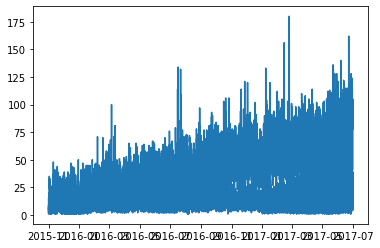

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

In [15]:
 plt.plot(df['DateTime'],df['Vehicles'])
 plt.show()
 plt.figure(figsize=(20,7))

In [17]:
df.index=df["DateTime"]
df['y']=df['Vehicles']
df.drop(columns=['ID','DateTime','Vehicles'],axis=1,inplace=True)
df=df.resample('D').sum()

In [18]:
df.head()

,Junction,y
DateTime,,
2015-11-01,144,596
2015-11-02,144,909
2015-11-03,144,911
2015-11-04,144,818
2015-11-05,144,770


In [19]:
df

,Junction,y
DateTime,,
2015-11-01,144,596
2015-11-02,144,909
2015-11-03,144,911
2015-11-04,144,818
2015-11-05,144,770
...,...,...
2017-06-26,240,2956
2017-06-27,240,3709
2017-06-28,240,3579


In [20]:
 df['ds']=df.index
 df.head()

,Junction,y,ds
DateTime,,,
2015-11-01,144,596,2015-11-01
2015-11-02,144,909,2015-11-02
2015-11-03,144,911,2015-11-03
2015-11-04,144,818,2015-11-04
2015-11-05,144,770,2015-11-05


In [23]:
size=60
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=size/len(df),shuffle=False)

In [24]:
train.tail()

,Junction,y,ds
DateTime,,,
2017-04-27,240,2936,2017-04-27
2017-04-28,240,2589,2017-04-28
2017-04-29,240,2100,2017-04-29
2017-04-30,240,2084,2017-04-30
2017-05-01,240,2461,2017-05-01


In [25]:
 test.head()

,Junction,y,ds
DateTime,,,
2017-05-02,240,3065,2017-05-02
2017-05-03,240,2987,2017-05-03
2017-05-04,240,3006,2017-05-04
2017-05-05,240,2785,2017-05-05
2017-05-06,240,1936,2017-05-06


In [26]:
model=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.9)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x1fl1b4/w2aolb1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x1fl1b4/2tzjri3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35700', 'data', 'file=/tmp/tmp_x1fl1b4/w2aolb1g.json', 'init=/tmp/tmp_x1fl1b4/2tzjri3z.json', 'output', 'file=/tmp/tmp9rngbpgl/prophet_model-20220814172804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future= model.make_future_dataframe(periods=60)
future

,ds
0,2015-11-01
1,2015-11-02
2,2015-11-03
3,2015-11-04
4,2015-11-05
...,...
603,2017-06-26
604,2017-06-27
605,2017-06-28
606,2017-06-29


In [28]:
forecast=model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,799.588048,147.160252,643.662788,799.588048,799.588048,-414.673309,-414.673309,-414.673309,-386.483380,-386.483380,-386.483380,-28.189928,-28.189928,-28.189928,0.0,0.0,0.0,384.914739
1,2015-11-02,802.507852,658.034854,1140.889363,802.507852,802.507852,95.392564,95.392564,95.392564,129.311552,129.311552,129.311552,-33.918988,-33.918988,-33.918988,0.0,0.0,0.0,897.900416
2,2015-11-03,805.427656,699.090760,1182.946761,805.427656,805.427656,131.646937,131.646937,131.646937,170.980339,170.980339,170.980339,-39.333402,-39.333402,-39.333402,0.0,0.0,0.0,937.074593
3,2015-11-04,808.347460,688.580907,1173.457014,808.347460,808.347460,119.401794,119.401794,119.401794,163.761122,163.761122,163.761122,-44.359328,-44.359328,-44.359328,0.0,0.0,0.0,927.749254
4,2015-11-05,811.267264,662.691894,1152.616308,811.267264,811.267264,105.517981,105.517981,105.517981,154.437790,154.437790,154.437790,-48.919810,-48.919810,-48.919810,0.0,0.0,0.0,916.785245


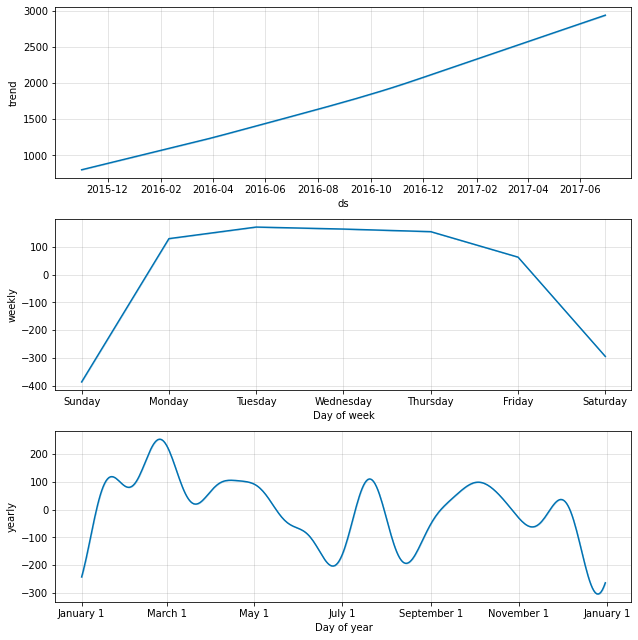

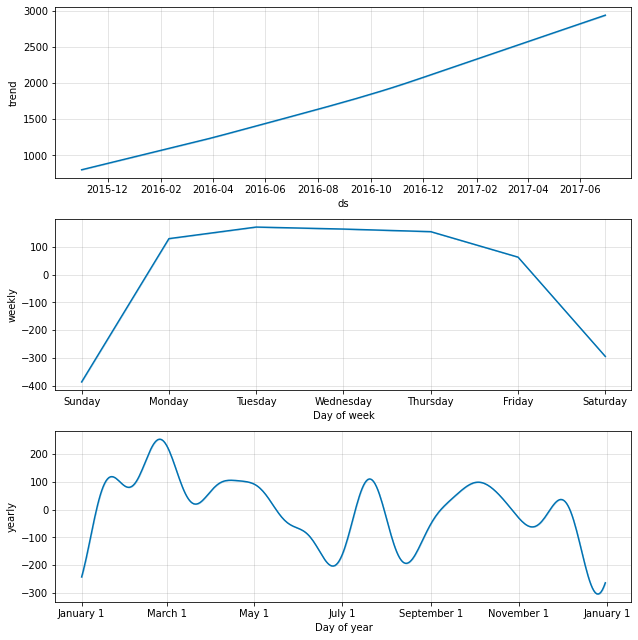

In [29]:
model.plot_components(forecast)

In [30]:
pred=forecast.iloc[-60:,:]
len(pred)

60

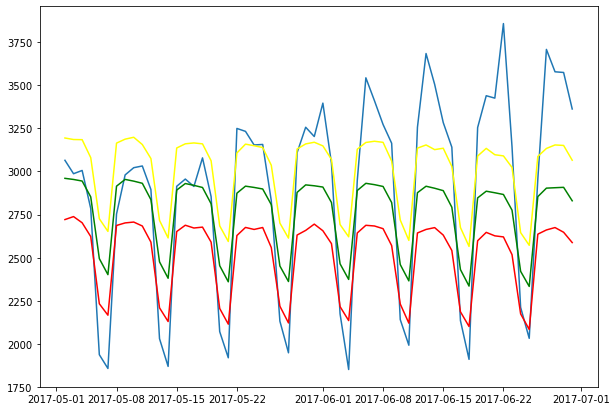

In [33]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'])
plt.plot(pred['ds'],pred['yhat'],color='green')
plt.plot(pred['ds'],pred['yhat_lower'],color='red')
plt.plot(pred['ds'],pred['yhat_upper'],color='yellow')
plt.show() 

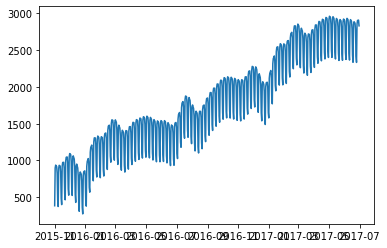

In [34]:
plt.plot(forecast['ds'],forecast['yhat'])
plt.show()

In [35]:
model=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.9)
model.fit(df)
future=model.make_future_dataframe(periods=200)
forecast=model.predict(future)
forecast.head()



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x1fl1b4/lwuhdvql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x1fl1b4/35o296wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22894', 'data', 'file=/tmp/tmp_x1fl1b4/lwuhdvql.json', 'init=/tmp/tmp_x1fl1b4/35o296wa.json', 'output', 'file=/tmp/tmp0i227g7s/prophet_model-20220814174212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,805.967036,94.888653,610.944190,805.967036,805.967036,-447.058304,-447.058304,-447.058304,-437.839027,-437.839027,-437.839027,-9.219277,-9.219277,-9.219277,0.0,0.0,0.0,358.908732
1,2015-11-02,808.963485,643.177345,1170.583179,808.963485,808.963485,117.772464,117.772464,117.772464,134.566793,134.566793,134.566793,-16.794329,-16.794329,-16.794329,0.0,0.0,0.0,926.735949
2,2015-11-03,811.959934,718.916550,1252.079194,811.959934,811.959934,176.470547,176.470547,176.470547,200.453862,200.453862,200.453862,-23.983315,-23.983315,-23.983315,0.0,0.0,0.0,988.430481
3,2015-11-04,814.956383,686.020370,1245.929516,814.956383,814.956383,155.323523,155.323523,155.323523,186.003340,186.003340,186.003340,-30.679817,-30.679817,-30.679817,0.0,0.0,0.0,970.279906
4,2015-11-05,817.952832,704.938791,1249.117766,817.952832,817.952832,145.846350,145.846350,145.846350,182.624082,182.624082,182.624082,-36.777732,-36.777732,-36.777732,0.0,0.0,0.0,963.799182


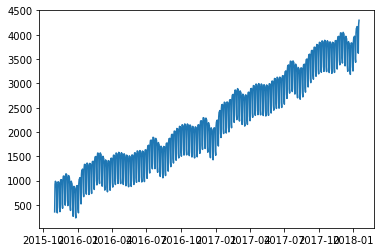

In [36]:
 plt.plot(forecast['ds'],forecast['yhat'])
plt.show()
